In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import math
import seaborn as sb

In [ ]:
df = pd.read_csv('crop_prod.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
print(df.nunique)
df.isna().sum()   #Checking na values

<bound method DataFrame.nunique of                          State_Name District_Name  ...      Area Production
0       Andaman and Nicobar Islands      NICOBARS  ...    1254.0     2000.0
1       Andaman and Nicobar Islands      NICOBARS  ...       2.0        1.0
2       Andaman and Nicobar Islands      NICOBARS  ...     102.0      321.0
3       Andaman and Nicobar Islands      NICOBARS  ...     176.0      641.0
4       Andaman and Nicobar Islands      NICOBARS  ...     720.0      165.0
...                             ...           ...  ...       ...        ...
246071                  West Bengal       PURULIA  ...     306.0      801.0
246072                  West Bengal       PURULIA  ...     627.0      463.0
246073                  West Bengal       PURULIA  ...     324.0    16250.0
246074                  West Bengal       PURULIA  ...  279151.0   597899.0
246075                  West Bengal       PURULIA  ...     175.0       88.0

[246076 rows x 7 columns]>


State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [ ]:
#Replacing missing values with median
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        med = df[col].median() #impute with the median
        df[col] = df[col].fillna(med)
df.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246076 entries, 0 to 246075
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246076 non-null  object 
 1   District_Name  246076 non-null  object 
 2   Crop_Year      246076 non-null  int64  
 3   Season         246076 non-null  object 
 4   Crop           246076 non-null  object 
 5   Area           246076 non-null  float64
 6   Production     246076 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
#px.box(df,y="Production")

In [ ]:
#Removing few outliers
df = df.loc[df.Production<1001000000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246076 entries, 0 to 246075
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246076 non-null  object 
 1   District_Name  246076 non-null  object 
 2   Crop_Year      246076 non-null  int64  
 3   Season         246076 non-null  object 
 4   Crop           246076 non-null  object 
 5   Area           246076 non-null  float64
 6   Production     246076 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.0+ MB


In [ ]:
#Dropping duplicates
cols_other_than_id = list(df.columns)[1:]
df.drop_duplicates(subset=cols_other_than_id, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246076 entries, 0 to 246075
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246076 non-null  object 
 1   District_Name  246076 non-null  object 
 2   Crop_Year      246076 non-null  int64  
 3   Season         246076 non-null  object 
 4   Crop           246076 non-null  object 
 5   Area           246076 non-null  float64
 6   Production     246076 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.0+ MB


In [ ]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,State_Name,District_Name,Season,Crop
0,Andaman and Nicobar Islands,NICOBARS,Kharif,Arecanut
1,Andaman and Nicobar Islands,NICOBARS,Kharif,Other Kharif pulses
2,Andaman and Nicobar Islands,NICOBARS,Kharif,Rice
3,Andaman and Nicobar Islands,NICOBARS,Whole Year,Banana
4,Andaman and Nicobar Islands,NICOBARS,Whole Year,Cashewnut


In [ ]:
df.State_Name.value_counts()

Uttar Pradesh                  33297
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13545
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4257
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

In [ ]:
df.District_Name.value_counts()

BIJAPUR      945
TUMKUR       936
BELGAUM      925
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
RAMGARH        6
KHUNTI         6
MUMBAI         1
NAMSAI         1
Name: District_Name, Length: 646, dtype: int64

In [ ]:
df.Season.value_counts()

Kharif         95949
Rabi           66983
Whole Year     57299
Summer         14838
Winter          6058
Autumn          4949
Name: Season, dtype: int64

In [ ]:
df.Crop.value_counts()

Rice                 15104
Maize                13945
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Plums                    6
Litchi                   6
Peach                    4
Apple                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(df['State_Name'].unique())
print(df['District_Name'].unique())
print(df['Season'].unique())
print(df['Crop'].unique())

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH

In [ ]:
# Encode labels in label columns
df['State_Name']= label_encoder.fit_transform(df['State_Name'])
df.State_Name.value_counts()

30    33297
16    22943
14    21122
4     18885
3     14628
22    13575
27    13545
17    12628
25    12514
6     10709
1      9628
32     9613
9      8436
10     5875
28     5649
31     4896
15     4257
21     3906
24     3173
19     2867
2      2546
11     2494
12     1634
29     1412
18     1267
13     1266
20      957
23      876
26      714
7       263
8       208
0       203
5        90
Name: State_Name, dtype: int64

In [ ]:
df['District_Name']= label_encoder.fit_transform(df['District_Name'])
df['Season']= label_encoder.fit_transform(df['Season'])
df['Crop']= label_encoder.fit_transform(df['Crop'])

In [ ]:
a=df.head(10000)

In [ ]:
a

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0
...,...,...,...,...,...,...,...
9995,2,113,2002,2,119,200.0,320.0
9996,2,113,2002,4,37,320.0,480.0
9997,2,113,2002,4,38,450.0,2475.0
9998,2,113,2002,4,66,3500.0,2887.0


In [ ]:
x=a.iloc[:,:-1].values
y=a.iloc[:,-1].values
x

array([[0.000e+00, 4.270e+02, 2.000e+03, 1.000e+00, 2.000e+00, 1.254e+03],
       [0.000e+00, 4.270e+02, 2.000e+03, 1.000e+00, 7.400e+01, 2.000e+00],
       [0.000e+00, 4.270e+02, 2.000e+03, 1.000e+00, 9.500e+01, 1.020e+02],
       ...,
       [2.000e+00, 1.130e+02, 2.002e+03, 4.000e+00, 3.800e+01, 4.500e+02],
       [2.000e+00, 1.130e+02, 2.002e+03, 4.000e+00, 6.600e+01, 3.500e+03],
       [2.000e+00, 1.130e+02, 2.002e+03, 4.000e+00, 8.700e+01, 5.000e+01]])

In [ ]:
#y

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=10)

In [ ]:
train_x

array([[1.000e+00, 5.670e+02, 2.010e+03, 2.000e+00, 3.700e+01, 2.811e+03],
       [1.000e+00, 5.670e+02, 2.014e+03, 2.000e+00, 1.070e+02, 1.170e+03],
       [1.000e+00, 6.260e+02, 2.014e+03, 2.000e+00, 1.120e+02, 5.500e+02],
       ...,
       [1.000e+00, 1.220e+02, 2.005e+03, 1.000e+00, 1.160e+02, 2.120e+02],
       [1.000e+00, 5.670e+02, 2.004e+03, 2.000e+00, 6.700e+01, 1.248e+03],
       [1.000e+00, 1.220e+02, 2.004e+03, 1.000e+00, 4.800e+01, 2.659e+03]])

In [ ]:
#train_y

In [ ]:
test_x

array([[1.0000e+00, 2.4000e+01, 2.0140e+03, 1.0000e+00, 4.2000e+01,
        3.0900e+02],
       [1.0000e+00, 6.3300e+02, 2.0010e+03, 1.0000e+00, 4.3000e+01,
        6.7000e+02],
       [1.0000e+00, 1.7200e+02, 2.0090e+03, 2.0000e+00, 1.0200e+02,
        1.5640e+03],
       ...,
       [1.0000e+00, 2.4000e+01, 2.0140e+03, 2.0000e+00, 1.1200e+02,
        4.1910e+03],
       [1.0000e+00, 4.6300e+02, 2.0120e+03, 1.0000e+00, 3.7000e+01,
        1.7409e+04],
       [1.0000e+00, 1.7200e+02, 2.0040e+03, 2.0000e+00, 4.3000e+01,
        4.3400e+02]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
trans = MinMaxScaler()
scale_train_x = trans.fit_transform(train_x)
scale_test_x=trans.transform(test_x)

In [ ]:
scale_train_x

array([[5.00000000e-01, 8.91625616e-01, 7.64705882e-01, 5.00000000e-01,
        2.89256198e-01, 3.20400261e-03],
       [5.00000000e-01, 8.91625616e-01, 1.00000000e+00, 5.00000000e-01,
        8.67768595e-01, 1.33291069e-03],
       [5.00000000e-01, 9.88505747e-01, 1.00000000e+00, 5.00000000e-01,
        9.09090909e-01, 6.25977734e-04],
       ...,
       [5.00000000e-01, 1.60919540e-01, 4.70588235e-01, 2.50000000e-01,
        9.42148760e-01, 2.40585249e-04],
       [5.00000000e-01, 8.91625616e-01, 4.11764706e-01, 5.00000000e-01,
        5.37190083e-01, 1.42184742e-03],
       [5.00000000e-01, 1.60919540e-01, 4.11764706e-01, 2.50000000e-01,
        3.80165289e-01, 3.03069001e-03]])

In [ ]:
import time
def euc_dist(sn,dn,yr,s,c,a):
    dist=[]
    for i in range(0,len(train_x)):
        d=0
        d=math.sqrt((sn-train_x[i][0])**2+(dn-train_x[i][1])**2+(yr-train_x[i][2])**2+(s-train_x[i][3])**2+(c-train_x[i][4])**2+(a-train_x[i][5])**2)
        #d=(sn-train_x[i-1:i]['State_Name'])**2+(dn-train_x[i-1:i]['District_Name'])**2+(yr-train_x[i-1:i]['Crop_Year'])**2+(s-train_x[i-1:i]['Season'])**2+(c-train_x[i-1:i]['Crop'])**2+(a-train_x[i-1:i]['Area'])**2
        dist.append(d)
    return dist

def kmin(dist):
    mindist=[]
    minind=[]
    for k in range(0,2):
        mindist.append(min(dist))
        ind=dist.index(min(dist))
        minind.append(dist.index(min(dist)))
        dist[ind]=1000000000000000000000
    return minind

    

#print(minind)   
def pred(minind):
    production=[]
    prodsum=0
    predicted=0
    for i in range(0,2):
        production.append(train_y[minind[i]])
        #print(train_y[minind[i]])
        prodsum+=train_y[minind[i]]
    predicted=prodsum/2
    #print(predicted)
    return predicted

p=[]
time_taken = []
for _ in range(1):
  # Starting timer
  start = time.time()
  for i in test_x:
    dist=euc_dist(i[0],i[1],i[2],i[3],i[4],i[5])
    minind=[]
    minind=kmin(dist)
    predicted_prod=pred(minind)
    p.append(predicted_prod)
  end = time.time()
  time_taken.append(end-start)
  
print("The time taken by serial code = ",np.mean(time_taken), " seconds")
atime=np.mean(time_taken)
    

The time taken by serial code =  101.36199903488159  seconds


In [ ]:
from numba import cuda
import warnings
warnings.filterwarnings("ignore")
import numba
from numba import jit, config, threading_layer,  prange, njit
import sys
import os
import math
config.THREADING_LAYER = 'omp'
@numba.njit(parallel = True)
def euc_dist(sn,dn,yr,s,c,a):
    dist=[]
    for i in range(0,len(train_x)):
        d=0
        d=math.sqrt((sn-train_x[i][0])**2+(dn-train_x[i][1])**2+(yr-train_x[i][2])**2+(s-train_x[i][3])**2+(c-train_x[i][4])**2+(a-train_x[i][5])**2)
        #d=(sn-train_x[i-1:i]['State_Name'])**2+(dn-train_x[i-1:i]['District_Name'])**2+(yr-train_x[i-1:i]['Crop_Year'])**2+(s-train_x[i-1:i]['Season'])**2+(c-train_x[i-1:i]['Crop'])**2+(a-train_x[i-1:i]['Area'])**2
        dist.append(d)
    return dist

def kmin(dist):
    mindist=[]
    minind=[]
    for k in range(0,2):
        mindist.append(min(dist))
        ind=dist.index(min(dist))
        minind.append(dist.index(min(dist)))
        dist[ind]=1000000000000000000000
    return minind

    

#print(minind)   
def pred(minind):
    production=[]
    prodsum=0
    predicted=0
    for i in range(0,2):
        production.append(train_y[minind[i]])
        #print(train_y[minind[i]])
        prodsum+=train_y[minind[i]]
    predicted=prodsum/2
    #print(predicted)
    return predicted


tdz = np.array([2, 4, 8, 16, 32, 64, 128]) 
ttime = []
ttime.append(atime)
for i in tdz:
  config.NUMBA_NUM_THREADS = i
  time_taken = []
  p=[]
  for _ in range(0,1):
    # Starting timer
    start = time.time()
    for i in test_x:
      dist=euc_dist(i[0],i[1],i[2],i[3],i[4],i[5])
      minind=[]
      minind=kmin(dist)
      predicted_prod=pred(minind)
      p.append(predicted_prod)
    
    end = time.time()
    time_taken.append(end-start)
  ttime.append(np.mean(time_taken))
avgp=0
sump=0
'''for i in range(1,len(ttime)):
  sump+=ttime[i]
avgp=sump/(len(ttime)-1)
t=[]
t.append(atime)
t.append(avgp)  '''
for i in range(1,len(ttime)):
  print("Number of threads = ",tdz[i-1])
  print("The time taken by parallel code = ",ttime[i], " seconds")
#print(ttime)


Number of threads =  2
The time taken by parallel code =  4.100363492965698  seconds
Number of threads =  4
The time taken by parallel code =  3.2294178009033203  seconds
Number of threads =  8
The time taken by parallel code =  3.217916488647461  seconds
Number of threads =  16
The time taken by parallel code =  3.172503709793091  seconds
Number of threads =  32
The time taken by parallel code =  3.167202949523926  seconds
Number of threads =  64
The time taken by parallel code =  3.143765687942505  seconds
Number of threads =  128
The time taken by parallel code =  3.1820850372314453  seconds


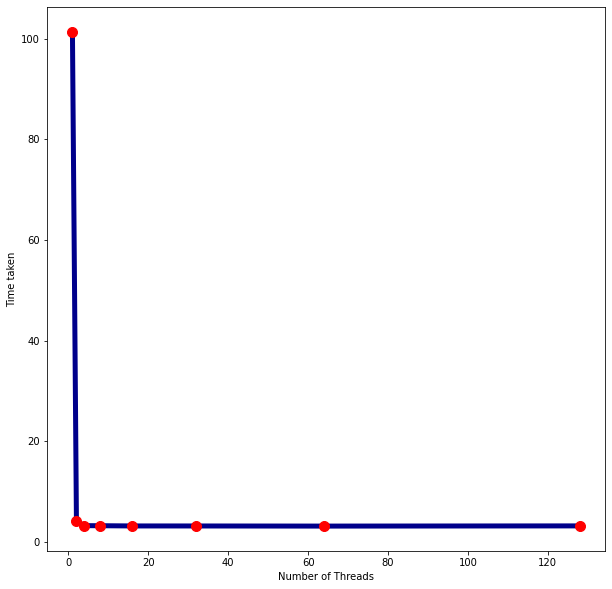

In [ ]:
x = np.array([1, 2, 4, 8, 16, 32, 64, 128])  
y = np.array(ttime)
#cols=["red","green","purple","orange","yellow","cyan","pink","darkblue"]
plt.figure(figsize=(10,10))
#for i in range(0,len(cols)):
plt.plot(x, y, "-o",color="darkblue", markerfacecolor="red",markeredgecolor="red",linewidth=5,markersize="10")
plt.xlabel("Number of Threads")
plt.ylabel("Time taken")
plt.show()

In [ ]:
df=pd.DataFrame({
    "test_y": test_y,
    "pred": p,
})
df

,test_y,pred
0,6886.00,882.5
1,1126.00,1314.5
2,310.00,55540.0
3,828.52,489.0
4,555.00,13809.5
...,...,...
1995,12170.00,1452858.5
1996,37.00,69.0
1997,87055.00,3781.0
1998,66119.00,27150.0


In [ ]:
from sklearn.metrics import r2_score
print('Accuracy:', r2_score(test_y, p))

Accuracy: 0.3736911089012904
